In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection, tree, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_squared_log_error, roc_auc_score
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


[]

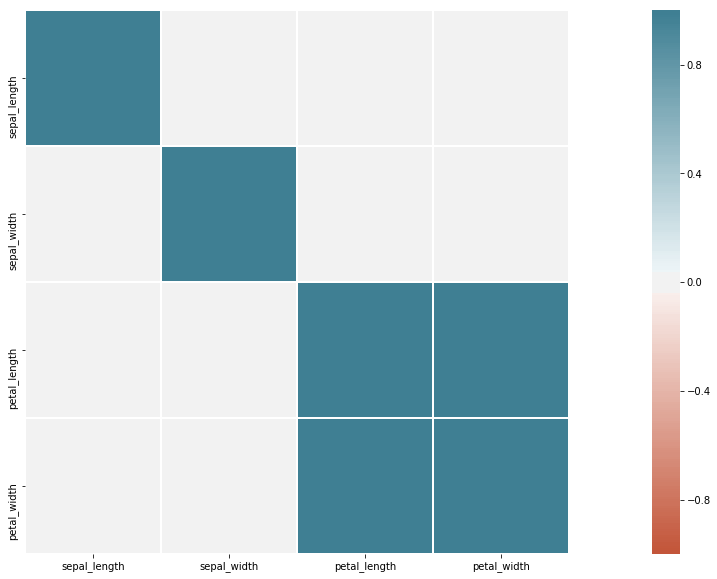

In [7]:
corr = data.corr()
plt.figure(figsize=(30,10))
ax = sns.heatmap(
    corr>0.9, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,linewidths=0.5
)
ax.plot()

In [14]:
data["species"]= data["species"].replace("setosa", 0)
data["species"]= data["species"].replace("versicolor", 1)
data["species"]= data["species"].replace("virginica", 2)
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [30]:
X = data.drop(['species'], axis = 1)
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [18]:
y = data['species']
y

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
120    2
121    2
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    2
133    2
134    2
135    2
136    2
137    2
138    2
139    2
140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [19]:
test_size = 0.3
seed = 3
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, test_size = test_size, random_state = seed)


In [31]:
num_folds = 10
scoring = 'accuracy'

models = []
models.append(('Logistic', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('GB', XGBClassifier()))
models.append(('Forest', RandomForestClassifier()))
models.append(('Light', LGBMClassifier()))

In [32]:
results = []

names = []
model_comp = pd.DataFrame(columns=['Model', 'Test Accuracy', 'Std Dev'])

for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    model_comp = model_comp.append([{'Model': name, 'Test Accuracy': cv_results.mean(), 'Std Dev': cv_results.std()}])

model_comp



,Model,Test Accuracy,Std Dev
0,Logistic,0.952727,0.062430
0,CART,0.932727,0.089184
0,GB,0.933636,0.088891
0,Forest,0.923636,0.086454
0,Light,0.941818,0.090927
